### WorkShop: Árbol de Decisión modelo de Clasificación en Scikit-Learn - Titanic

**Resolución**: EDA (Análisis Exploratorio de Datos)

1. Importar las librerías necesarias para la realización del desafío y el dataset propuesto para la ejercitación.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
url = 'https://raw.githubusercontent.com/FFernandezP/TitanicExample/main/Titanic.csv'
df= pd.read_csv(url)

2. Imprimir las 5 primeras filas del dataset.

In [76]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


3. Imprimir las 5 primeras últimas filas del dataset.

In [77]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch
709,0,3,1,39.0,0,5
710,0,2,0,27.0,0,0
711,1,1,1,19.0,0,0
712,1,1,0,26.0,0,0
713,0,3,0,32.0,0,0


4. Imprimir las dimensiones del dataset.

In [78]:
df.ndim

2

5. Obtener la totalidad de registros por columnas

In [79]:
df.count()

Survived    714
Pclass      714
Sex         714
Age         714
SibSp       714
Parch       714
dtype: int64

6. Analizar el tipo de dato de cada columna

In [80]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
dtype: object

7. Obtener el tipo de estructura del dataset

In [81]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000


8. Listar los nombres de las columnas

In [82]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

**Resolución**: Machine Learning - Modelo de Clasificación

9.	Separar los features en X e y

In [83]:
from sklearn.model_selection import train_test_split
x = df[['Pclass','Sex','Age','SibSp','Parch']]
y = df['Survived']

10. Separar los datos en Train (70 %) y Test (30 %) con un random_state=42.

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

11.	Crear un objeto de Árbol de Decisión para un modelo de clasificación, con un Nivel de Profundidad = 2 y una Semilla para la reproducibilidad = 42

In [90]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)


12.	Entrenar el modelo creado

In [91]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

13. Realizar la predicción del modelo en Train y Test

In [92]:
y_pred= clf.predict(x_test)
y_pred1= clf.predict(x_train)

14.	Calcular la métrica de Accuracy en Train y Test 

In [93]:
from sklearn.metrics import accuracy_score
Exactitud = accuracy_score(y_pred=y_pred, y_true= y_test)
print(Exactitud)

0.7796610169491526


In [94]:
Exactitud1 = accuracy_score(y_pred=y_pred1, y_true= y_train)
print(Exactitud1)

0.8138075313807531


15. Graficar las variables de importancia del Árbol de Decisión 

In [95]:
from sklearn.tree import plot_tree


[Text(0.5, 0.8333333333333334, 'Sex <= 0.5\ngini = 0.48\nsamples = 478\nvalue = [287, 191]'),
 Text(0.25, 0.5, 'Age <= 3.5\ngini = 0.311\nsamples = 306\nvalue = [247, 59]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.279\nsamples = 293\nvalue = [244, 49]'),
 Text(0.75, 0.5, 'Pclass <= 2.5\ngini = 0.357\nsamples = 172\nvalue = [40, 132]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.106\nsamples = 107\nvalue = [6, 101]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.499\nsamples = 65\nvalue = [34, 31]')]

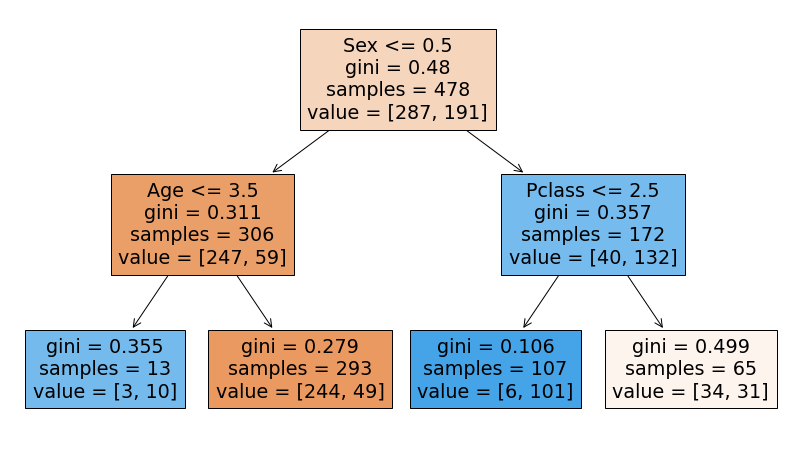

In [96]:
plt.figure(figsize=(14,8))
plot_tree(decision_tree=clf, feature_names=x_train.columns, filled=True)